# Konwolucyjne sieci neuronowe

Dziś spróbujemy stworzyć i wytrenować prostą sieć konwolucyjną do rozpoznawania, co znajduje się na obrazie. Następnie omówimy kwestię identyfikowania obiektów na obrazie, oraz porozmawiamy o wykorzystaniu gotowej już sieci.

## Problem klasyfikacji obrazów

Jak się za to zabrać? Naiwnym podejściem byłaby próba ręcznej specyfikacji pewnych cech (niemowlęta mają duże głowy, szczoteczki są długie, etc.). Szybko jednak stwierdziliśmy, że nawet dla niewielkiego zbioru kategorii jest to tytaniczna praca bez gwarancji sukcesu. Co więcej, istnieje wiele czynników zniekształcających zawartość naszych zdjęć. Obiekty mogą być przedstawiane z różnych ujęć, w różnych warunkach oświetleniowych, w różnej skali, częściowo niewidoczne, ukryte w tle...

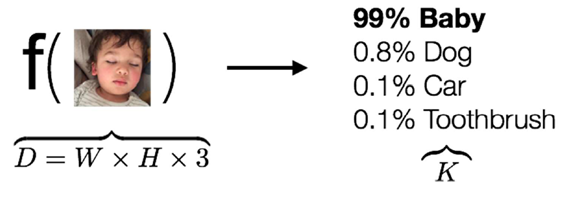


Wszystkie wymienione problemy są skutkiem istnienia semantycznej przepaści między tym, jak reprezentowane są nasze dane wejściowe (tablica liczb), a tym, czego w nich szukamy, czyli kategorii i cech: zwierząt, nosów, głów, itp. Zamiast więc próbować samodzielnie napisać funkcję $f(x)$, spróbujemy skorzystać z dobrodziejstw uczenia maszynowego, aby automatycznie skonstruować reprezentację wejścia właściwą dla postawionego sobie zadania (a przynajmniej lepszą od pierwotnej). I tu z pomocą przychodzą nam konwolucyjne sieci neuronowe. Do tego trzeba zrozumieć, czym jest konwolucja (inaczej: splot), a do tego najlepiej nadają się ilustracje, jak to działa.

### Konwolucja

Konwolucja (splot) to działanie określone dla dwóch funkcji, dające w wyniku inną, która może być postrzegana jako zmodyfikowana wersja oryginalnych funkcji.

Z naszego punktu widzenia polega to na tym, że mnożymy odpowiadające sobie elementy z dwóch macierzy: obrazu, oraz mniejszej, nazywanej filtrem (lub kernelem. Następnie sumujemy wynik i zapisujemy do macierzy wynikowej na odpowiedniej pozycji. Proces powtarza się aż do momentu przeskanowania całego obrazu. Taki filtr wykrywa, czy coś do niego pasuje w danym miejscu, i z tego wynika zdolność semantycznej generalizacji sieci - uczymy się cech, a wykrywamy je potem w dowolnym miejscu. [Przydatne pojęcia](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

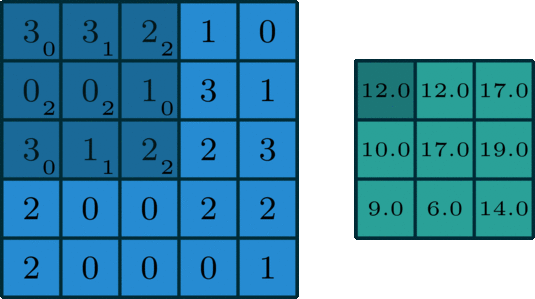

### Stride

Stride to inaczej *krok algorytmu*, albo *przesunięcie*. Określa co ile komórek macierzy następuje aplikacja operatora konwolucji. Jeśli stride wynosi 1 a operator konwolucji ma rozmiar np. 3 x 3, to każdy piksel (z wyjątkiem skrajnych narożnych pikseli) będzie uczestniczył w wielu operacjach konwolucji. Jeśli natomiast krok wyniósłby 3, to każdy piksel uczestniczyłby tylko jednokrotnie w tych operacjach. Należy pamiętać, że krok stosujemy zarówno w poziomie, jak i pionie. Najczęściej w obu kierunkach wykorzystuje się ten sam krok.


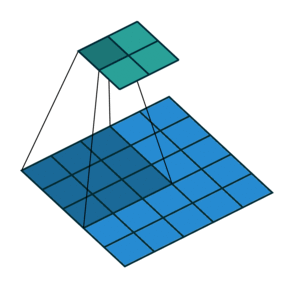



### Padding

Padding to inaczej *wypełnienie* krawędzi obrazu. Określa, w jaki sposób będą traktowane skrajne piksele. Jeśli padding wynosi 0, to skrajne piksele będą uczestniczyły w operacjach konwolucji rzadziej, niż pozostałe piksele (oczywiście jest to również uzależnione od wartości kroku). Aby zniwelować ten efekt, możemy dodać wypełnienie wokół całego obrazu. Te dodatkowe piksele mogą być zerami, albo mogą być również jakimiś uśrednionymi wartościami pikseli sąsiednich. Wypełnienie zerami oznacza de facto obramowanie całego obrazu czarną ramkną. 

[Więcej na temat wypełnienia.](https://www.geeksforgeeks.org/cnn-introduction-to-padding/)

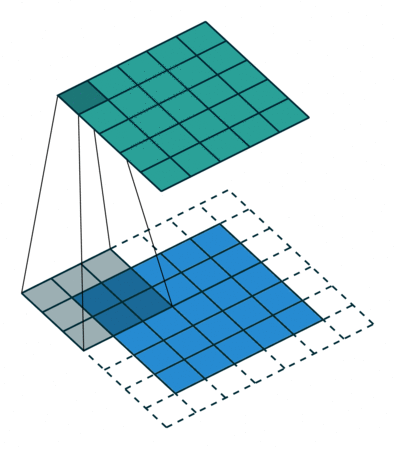

### Pooling

Pooling jest procesem wykorzystywanym do redukcji rozmiaru obrazu. 
Występują 2 warianty: *max-pooling* oraz *avg-pooling*. Pozwala on usunąć zbędne dane, np. jeżeli filtr wykrywa linie, to istnieje spora szansa, że linie te ciągną się przez sąsiednie piksele, więc nie ma powodu powielać tej informacji. Dzięki temu wprowadzamy pewną inwariancję w wagach sieci i jesteśmy odporni na niewielkie wahania lokalizacji informacji, a skupiamy się na "większym obrazie".

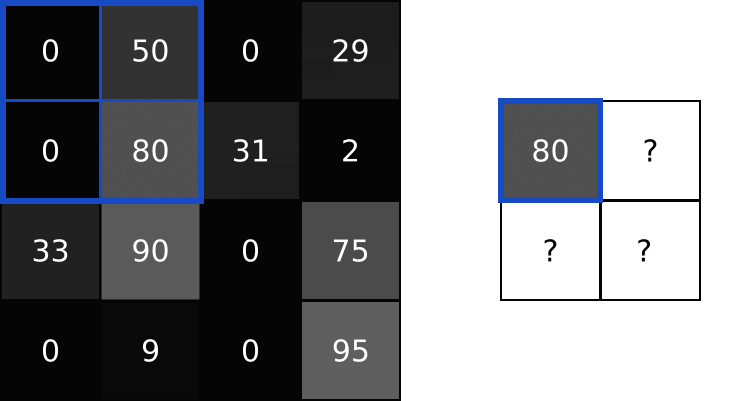

### Sposoby redukcji przeuczenia

* warstwa dropout - wyłączanie losowych neuronów w trakcie uczenia,
* regularyzacja wag - ograniczenie sumy wartości wag,
* metoda wczesnego stopu (early stopping) - zatrzymanie uczenia, jeśli proces uczenia nie poprawia wyników,
* normalizacja paczki (batch normalization) - centrowanie i skalowanie wartości wektorów *w obrębie batcha danych*, 
* rozszerzanie danych (data augmentation) - generowanie lekko zaburzonych danych, na podstawie danych treningowych,
* lub... więcej danych.

### Budowa sieci CNN do klasyfikacji obrazów

Sieć konwolucyjna składa się zawsze najpierw, zgodnie z nazwą, z części konwolucyjnej, której zadaniem jest wyodrębnienie przydatnych cech z obrazu za pomocą filtrów, warstw poolingowych etc.

Warstwa konwolucyjna sieci neuronowej składa się z wielu filtrów konwolucyjnych działających równolegle (tj. wykrywających różne cechy). Wagi kerneli, początkowo zainicjalizowane losowo, są dostrajane w procesie uczenia. Wynik działania poszczególnych filtrów jest przepuszczany przez funkcję nieliniową. Mamy tu do czynienia z sytuacją analogiczną jak w MLP: najpierw wykonujemy przekształcenie liniowe, a potem stosujemy funkcję aktywacji. Funkcji aktywacji nie stosuje się jendak po warstawch poolingowych, są to stałe operacje nie podlegające uczeniu.

W celu klasyfikacji obrazu musimy później użyć sieci MLP. Jako że wejściem do sieci MLP jest zawsze wektor, a wyjściem warstwy konwolucyjnej obraz. Musimy zatem obraz przetworzony przez filtry konwolucyjne sprowadzić do formy wektora, tzw. **embedding-u / osadzenia**, czyli reprezentacji obrazu jako punktu w pewnej ciągłej przestrzeni. Służy do tego warstwa spłaszczająca (flatten layer), rozwijająca macierze wielkowymiarowe na wektor, np $10 \times 10 \times 3$ na $300 \times 1$.

Część konwolucyjna nazywa się często **backbone**, a część MLP do klasyfikacji **head**. Głowa ma zwykle 1-2 warstwy w pełni połączone, z aktywacją softmax w ostatniej warstwie. Czasem jest nawet po prostu pojedynczą warstwą z softmaxem, bo w dużych sieciach konwolucyjnych ekstrakcja cech jest tak dobra, że taka prosta konstrukcja wystacza do klasyfikacji embeddingu.

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

Wybierzmy rodzaj akceleracji. Współczesne wersje PyTorch wspierają akcelerację nie tylko na kartach Nvidii i AMD, ale również na procesorach Apple z serii M. Obsługa AMD jest realizowana identycznie jak CUDA natomiast MPS (Apple) ma nieco inne API do sprawdzania dostępności i wybierania urządzenia. 
Zapisujemy wybrane urządzenie do zmiennej `device`, dzięki czemu w dalszych częściach kodu już nie będziemy musieli o tym myśleć.

In [5]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")

print(device)

cuda:0


W pakiecie torchvision mamy funkcje automatycznie pobierające niektóre najbardziej popularne zbiory danych z obrazami. 

W tym ćwiczeniu wykorzystamy zbiór FashionMNIST, który zawiera małe (28x28) zdjęcia ubrań w skali szarości. Zbiór ten został stworzony przez Zalando i jest "modowym" odpowiednikiem "cyferkowego" MNIST-a, jest z nim kompatybilny pod względem rozmiarów i charakterystyki danych, ale jest od MNIST-a trudniejszy w klasyfikacji.

Do funkcji ładujących zbiory danych możemy przekazać przekształcenie, które powinno zostać na nim wykonane. Przekształcenia można łączyć przy użyciu `transforms.Compose`. W tym przypadku przekonwertujemy dane z domyślnej reprezentacji PIL.Image na torch-owe tensory.

Pobrany dataset przekazujemy pod kontrolę DataLoader-a, który zajmuje się podawaniem danych w batch-ach podczas treningu.

In [6]:
transform = transforms.Compose([transforms.ToTensor()])

batch_size = 32

trainset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True
)

testset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=True
)

classes = (
    "top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
)

print(type(testset[0][0]))

<class 'torch.Tensor'>


Zobaczmy, co jest w naszym zbiorze danych. Poniżej kawałek kodu, który wyświetli nam kilka przykładowych obrazków. Wartości pikseli są znormalizowane do przedziału [0,1].

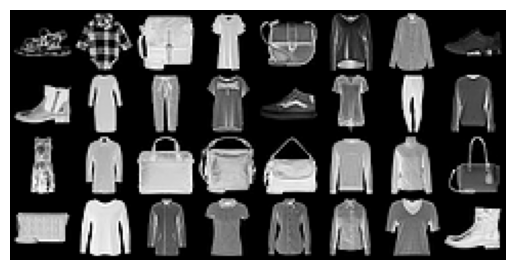

Sandal     Shirt      Bag        Dress      Bag        Pullover   Shirt      Sneaker   
Ankle boot Dress      Trouser    top        Sneaker    top        Trouser    Pullover  
Dress      Coat       Bag        Bag        Bag        Pullover   Coat       Bag       
Bag        top        Coat       top        Shirt      Shirt      top        Ankle boot


In [4]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

def grid_show(images, nrow=8):
    imshow(torchvision.utils.make_grid(images, nrow=nrow))


def print_grid(labels, nrow=8):
    rows = [labels[n : n + nrow] for n in range(0, len(labels), nrow)]
    for r in rows:
        print(" ".join(f"{classes[c]:10s}" for c in r))

grid_show(images)
print_grid(labels)

## LeNet

LeNet to bardzo znany, klasyczny model sieci konwolucyjnej.

Warstwy:
- obraz
- konwolucja, kernel $5 \times 5$, bez paddingu, 6 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- konwolucja, kernel $5 \times 5$, bez paddingu, 16 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- warstwa w pełni połączona, 120 neuronów na wyjściu
- warstwa w pełni połączona, 84 neurony na wyjściu
- warstwa w pełni połączona, na wyjściu tyle neuronów, ile jest klas

### Zadanie 1 (2 punkty)


Zaimplementuj wyżej opisaną sieć, używając biblioteki PyTorch. Wprowadzimy sobie jednak pewne modyfikacje, żeby było ciekawiej:
- w pierwszej warstwie konwolucyjnej użyj 20 kanałów (feature maps)
- w drugiej warstwie konwolucyjnej użyj 50 kanałów (feature maps)
- w pierwszej warstwie gęstej użyj 300 neuronów
- w drugiej warstwie gęstej użyj 100 neuronów

Przydatne elementy z pakietu `torch.nn`:
* `Conv2d()`
* `AvgPool2d()`
* `Linear()`

Z pakietu `torch.nn.functional`:
* `relu()`

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.lenet = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=20,out_channels= 50, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(800, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
    
    def forward(self, x):
        x = self.lenet(x)
        return x
    

# your_code

In [6]:
lenet = LeNet()
param_num = sum(p.numel() for p in lenet.parameters())
print(param_num)
assert param_num == 132704
print("Solution is correct!")





296980


AssertionError: 

Do treningu użyjemy stochastycznego spadku po gradiencie (SGD), a jako funkcję straty Categorical Cross Entropy. W PyTorch-u funkcja ta operuje na indeksach klas (int), a nie na wektorach typu one-hot (jak w Tensorflow).

In [7]:
import torch.optim as optim

net = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Zadanie 2 (1 punkt)

Uzupełnij pętlę uczącą sieć na podstawie jej predykcji. Oblicz (wykonaj krok do przodu) funkcję straty, a następnie przeprowadź propagację wsteczną i wykonaj krok optymalizatora.

In [8]:
net.train()

for epoch in range(5):
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = net(images.to(device))
        loss = criterion(output,labels.to(device))
        loss.backward()
        optimizer.step()
        
# your_code

Zobaczmy na kilku przykładach jak działa wytrenowana sieć.

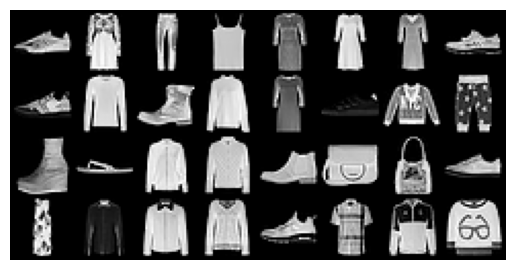

Ground Truth
Sneaker    Dress      Trouser    top        Dress      Dress      Dress      Sandal    
Sneaker    Pullover   Ankle boot Pullover   Dress      Sneaker    Pullover   Trouser   
Ankle boot Sandal     Coat       Coat       Ankle boot Bag        Bag        Sneaker   
Dress      Shirt      Coat       Pullover   Sneaker    Shirt      Coat       Pullover  

Predicted
Sneaker    Dress      Trouser    top        Dress      Dress      Dress      Sneaker   
Sneaker    Pullover   Ankle boot Coat       Dress      Sandal     Bag        Trouser   
Ankle boot Sandal     Coat       Coat       Ankle boot Bag        Bag        Sneaker   
Dress      Shirt      Shirt      Pullover   Sneaker    top        Bag        Bag       


In [9]:
dataiter = iter(testloader)
images, labels = next(dataiter)

grid_show(images)
print("Ground Truth")
print_grid(labels)

outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print()
print("Predicted")
print_grid(predicted)

Obliczmy dokładności (accuracy) dla zbioru danych.

In [10]:
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 81 %


Skomentuj wyniki:
Sieć osiągnęła 86% dokładności na zbiorze testowym, co oznacza, że 86% obrazów zostało poprawnie zaklasyfikowanych. 
Jest to przyzwoity wynik, szczególnie że rozdzielczość obrazów jest dosyć niska 
Na podstawie powyższych wyników można zauważyć że najczęściej mylonymi klasami są:
* Coat i pullover
* Dress i Shirt
* Ankle boot oraz Sneaker

* 

Znając ogólny wynik klasyfikacji dla zbioru przeanalizujmy dokładniej, z którymi klasami jest największy problem.

### Zadanie 3 (1 punkt)

Oblicz dokładność działania sieci (accuracy) dla każdej klasy z osobna. Podczas oceniania skuteczności modelu nie potrzebujemy, aby gradienty się liczyły. Możemy zatem zawrzeć obliczenia w bloku `with torch.no_grad():`

In [11]:
correct_preds = {classname: 0 for classname in classes}
total_preds = {classname: 0 for classname in classes}
net.eval()
with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        for label, prediction in zip(labels.to(device), predicted):
            classname = classes[label.item()]
            if label == prediction:
                correct_preds[classname] += 1
            total_preds[classname] += 1
for classname, correct in correct_preds.items():
    accuracy = correct/total_preds[classname]*100
    print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")
    
# 

# your_code

Accuracy for class: top   is 84.3 %
Accuracy for class: Trouser is 94.3 %
Accuracy for class: Pullover is 68.9 %
Accuracy for class: Dress is 74.5 %
Accuracy for class: Coat  is 79.4 %
Accuracy for class: Sandal is 89.4 %
Accuracy for class: Shirt is 42.4 %
Accuracy for class: Sneaker is 96.7 %
Accuracy for class: Bag   is 95.7 %
Accuracy for class: Ankle boot is 89.5 %


Skomentuj wyniki:
Po ponownej analizie wynikó widać że największy problem jest z rozróżnianiem klasy Shirt. 
Kolejnymi klasami sprawiającymi problemy są Pullovery i Topy co w sumie jest logiczne bo te 3 klasy mają podobny wygląd na zdjęciach.
Co ciekawego się okazało model nie ma jednak problemu z odróżnianiem Anbkle boots od Sneakersów

*   

## Detekcja obiektów

Problem detekcji polega na nie tylko sklasyfikowaniu obiektów na obrazie, ale również wyznaczeniu jego dokładnego położenia w postaci bounding-box-u.
Choć jest to problem odmienny od klasyfikacji obrazów, to w praktyce ściśle z nim powiązany - modele do detekcji obiektów przeważnie do pewnego momentu wyglądają tak samo, jak modele klasyfikacji. Jednak pod koniec sieć jest dzielona na 2 wyjścia: jedno to standardowa klasyfikacja, a drugie to regresor określający pozycję obiektu na obrazie, tzw. bounding box. Najpopularniejszymi przykładami takich sieci są YOLO i Mask R-CNN. Zbiór danych też jest odpowiednio przygotowany do tego zadania i oprócz właściwych zdjęć zawiera również listę bounding-box-ów i ich etykiety.

Zobaczymy jak działa detekcja na przykładzie już wytrenowanej sieci neuronowej. Autorzy skutecznych sieci często udostępniają ich wagi online, dzięki czemu jeżeli mamy doczynienia z analogicznym problemem jak ten, do którego dana sieć była przygotowana możemy z niej skorzystać "prosto z pudełka". 

PyTorch pozwala nam na pobranie wytrenowanych wag dla kilku najpopularniejszych modeli. Sprawdzimy jak z tego skorzystać.

In [2]:
from torchvision.models import detection
import numpy as np
import cv2
from PIL import Image
import urllib

Poniżej znajduje się funkcja pozwalająca wczytać obraz z sieci. Przyda się do testowania działania sieci.

In [10]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

Model, którym się zajmiemy to Faster R-CNN, który był trenowany na zbiorze COCO. Poniżej znajduje się lista klas (etykiet) dla tego zbioru danych.

In [11]:
classes = [
    "__background__",
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "street sign",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "hat",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "shoe",
    "eye glasses",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "plate",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "mirror",
    "dining table",
    "window",
    "desk",
    "toilet",
    "door",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "blender",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]

colors = np.random.randint(0, 256, size=(len(classes), 3))

Inizjalizacja modelu ResNet50-FPN wytrenowanymi wagami. Inicjalizujemy zarówno sieć backbone jak i RCNN.

In [12]:
model = detection.fasterrcnn_resnet50_fpn(
    weights=detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT,
    weights_backbone=torchvision.models.ResNet50_Weights.DEFAULT,
    progress=True,
    num_classes=len(classes)
).to(device)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

IPython, z którego korzystamy w Jupyter Notebooku, ma wbudowaną funkcję `display()` do wyświetlania obrazów. 

Do pobierania obrazów możemy się posłyżyć wget-em.

In [45]:
# Pobieranie obrazka z sieci
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg --output-document toothbrushes.jpg

--2024-12-07 21:09:13--  https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 339825 (332K) [image/jpeg]
Saving to: ‘toothbrushes.jpg’

toothbrushes.jpg    100%[===================>] 331.86K  --.-KB/s    in 0.09s   

2024-12-07 21:09:13 (3.56 MB/s) - ‘toothbrushes.jpg’ saved [339825/339825]



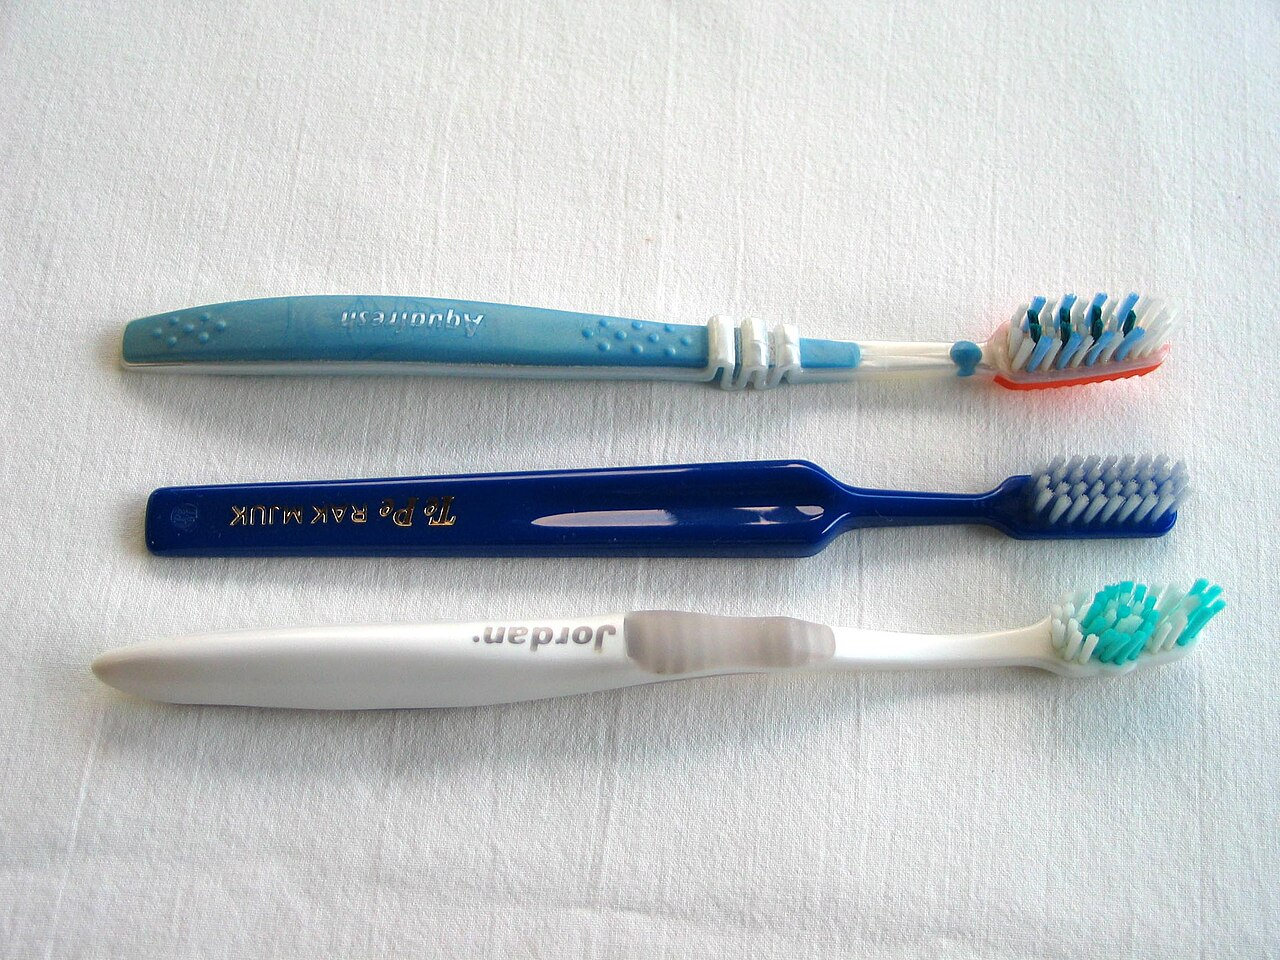

In [13]:
# Wyświetlanie obrazka
image = Image.open("toothbrushes.jpg")
# make sure we have 3-channel RGB, e.g. without transparency
image = image.convert("RGB")
display(image)

PyTorch wymaga obrazów w kształcie [channels, height, width] (C, H, W) oraz z wartościami pikseli między 0 a 1. Pillow wczytuje obrazy z kanałami (H, W, C) oraz z wartościami pikseli między 0 a 255. Przed wykorzystaniem sieci neuronowej trzeba zatem:
- zamienić obraz na tensor
- zmienić kolejność kanałów
- podzielić wartości pikseli przez 255

In [14]:
image_tensor = torch.from_numpy(np.array(image))
image_tensor = image_tensor.permute(2, 0, 1)
image_tensor_int = image_tensor  # useful for displaying, dtype = uint8
image_tensor = image_tensor / 255
image_tensor.shape, image_tensor.dtype
image_tensor= image_tensor.unsqueeze(0)

### Zadanie 4 (1 punkt)

Użyj modelu do wykrycia obiektów na obrazie. Następnie wybierz tylko te bounding boxy, dla których mamy wynik powyżej 50%. Wypisz te bounding boxy, ich prawdopodobieństwa (w procentach) oraz nazwy klas.

Następnie wykorzystaj wyniki do zaznaczenia bounding box'a dla każdego wykrytego obiektu na obrazie oraz podpisz wykrytą klasę wraz z prawdopodobieństwem. Możesz tutaj użyć:
- [OpenCV](https://stackoverflow.com/questions/56108183/python-opencv-cv2-drawing-rectangle-with-text)
- [PyTorch - Torchvision](https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#visualizing-bounding-boxes)

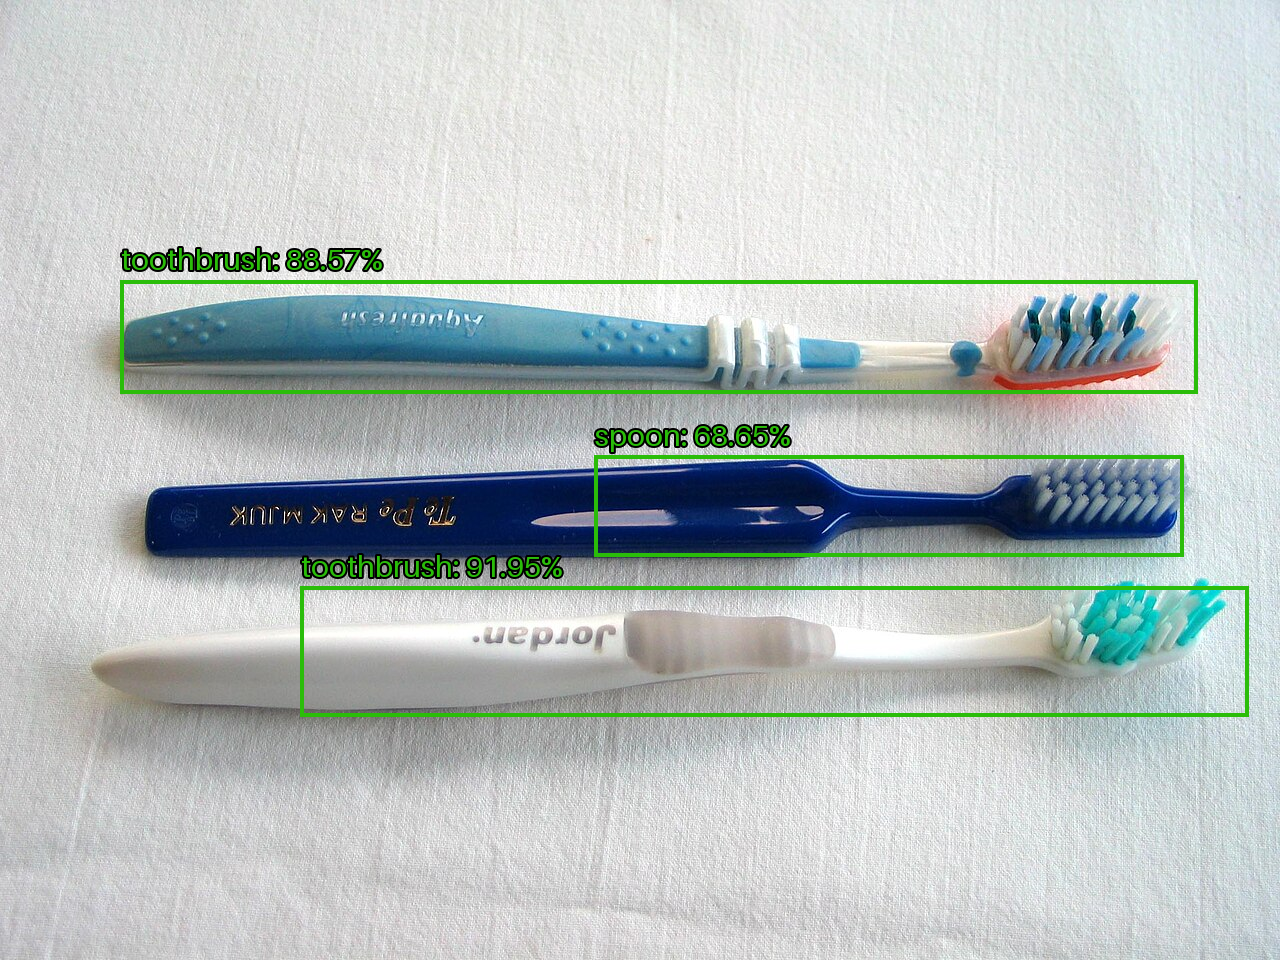

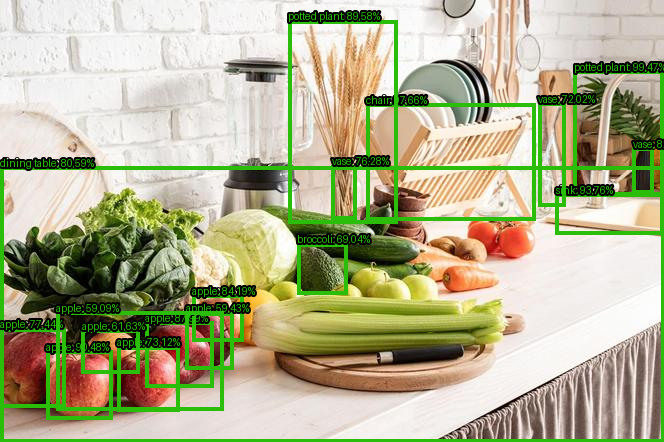

In [16]:
# your_code
from PIL import Image, ImageDraw, ImageFont
score_threshold = .5
image_to_draw= image.copy()

with torch.no_grad():
    outputs = model(image_tensor.to(device))[0]
draw = ImageDraw.Draw(image_to_draw)
for box,label,score in zip(outputs['boxes'],outputs['labels'],outputs['scores']):
    if score>score_threshold:
        label_text=f"{classes[label.item()]}: {score:.2%}"
        draw.rectangle([(box[0],box[1]),(box[2],box[3])],outline=(42, 189, 9),width=4)
        draw.text((box[0], box[1]-40), label_text, fill=(42, 189, 9),font_size=30,stroke_fill="black",stroke_width=2)        
display(image_to_draw)



image_to_draw = Image.open("img/kitchen.jpg")
image_to_draw = image_to_draw.convert("RGB")
image_tensor_2 = transform(image_to_draw).unsqueeze(0)
with torch.no_grad():
    outputs = model(image_tensor_2.to(device))[0]
draw = ImageDraw.Draw(image_to_draw)
for box,label,score in zip(outputs['boxes'],outputs['labels'],outputs['scores']):
    if score>score_threshold:
        label_text=f"{classes[label.item()]}: {score:.2%}"
        draw.rectangle([(box[0],box[1]),(box[2],box[3])],outline=(42, 189, 9),width=4)
        draw.text((box[0], box[1]-10), label_text, fill=(42, 189, 9),font_size=10,stroke_fill="black",stroke_width=2)        
display(image_to_draw)

## Fine-tuning i pretrening

Trenowanie głębokich sieci neuronowych do przetwarzania obrazów jest zadaniem wymagającym bardzo dużych zbiorów danych i zasobów obliczeniowych. Często jednak, nie musimy trenować takich sieci od nowa, możemy wykorzystać wytrenowane modele i jedynie dostosowywaać je do naszych problemów. Działanie takie nazywa się transfer learning-iem. 

Przykładowao: mamy już wytrenowaną sieć na dużym zbiorze danych (pretrening) i chcemy, żeby sieć poradziła sobie z nową klasą obiektów (klasyfikacja), albo lepiej radziła sobie z wybranymi obiektami, które już zna (fine-tuning). Możemy usunąć ostatnią warstwę sieci i na jej miejsce wstawić nową, identyczną, jednak z losowo zainicjalizowanymi wagami, a następnie dotrenować sieć na naszym nowym, bardziej specyficznym zbiorze danych. Przykładowo, jako bazę weźmiemy model wytrenowany na zbiorze ImageNet i będziemy chcieli użyć go do rozpoznawania nowych, nieznanych mu klas, np. ras psów.

Dla przećwiczenia takiego schematu działania wykorzystamy zbiór danych z hotdogami. Będziemy chcieli stwierdzić, czy na obrazku jest hotdog, czy nie. Jako sieci użyjemy modelu ResNet-18, pretrenowanej na zbiorze ImageNet.

In [19]:
# Download the hotdog dataset
!wget http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
!unzip -n hotdog.zip

--2024-12-08 14:19:58--  http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
Resolving d2l-data.s3-accelerate.amazonaws.com (d2l-data.s3-accelerate.amazonaws.com)... 13.32.34.235
Connecting to d2l-data.s3-accelerate.amazonaws.com (d2l-data.s3-accelerate.amazonaws.com)|13.32.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261292301 (249M) [application/zip]
Saving to: ‘hotdog.zip’

hotdog.zip          100%[===================>] 249.19M  12.0MB/s    in 23s     

2024-12-08 14:20:22 (10.9 MB/s) - ‘hotdog.zip’ saved [261292301/261292301]

Archive:  hotdog.zip
   creating: hotdog/
   creating: hotdog/train/
   creating: hotdog/train/not-hotdog/
 extracting: hotdog/train/not-hotdog/50.png  
 extracting: hotdog/train/not-hotdog/554.png  
 extracting: hotdog/train/not-hotdog/299.png  
  inflating: hotdog/train/not-hotdog/428.png  
  inflating: hotdog/train/not-hotdog/475.png  
  inflating: hotdog/train/not-hotdog/933.png  
 extracting: hotdog/train/not-hotdog/

Kiedy korzystamy z sieci pretrenowanej na zbiorze ImageNet, zgodnie [z dokumentacją](https://pytorch.org/vision/0.8/models.html) trzeba dokonać standaryzacji naszych obrazów, odejmując średnią i dzieląc przez odchylenie standardowe każdego kanału ze zbioru ImageNet.

```
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are
expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229,
0.224, 0.225]. You can use the following transform to normalize:

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

```

In [10]:
torch.manual_seed(17)

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

train_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

test_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

In [21]:
pretrained_net = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/stanislaw_barycki/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 96.5MB/s]


In [22]:
pretrained_net.fc

Linear(in_features=512, out_features=1000, bias=True)

### Zadanie 5 (1 punkt)

Zastąp wyjściową warstwę liniową naszej fine-fune'owanej sieci nową warstwą o odpowiedniej liczbie wyjść i zainicjuj ją losowymi wartościami.

In [30]:
finetuned_net = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)
finetuned_net.fc = nn.Linear(in_features=finetuned_net.fc.in_features, out_features=2) # your code here
# your_code

In [31]:
assert finetuned_net.fc.out_features == 2
print("Solution is correct!")

Solution is correct!


Poniżej znajduje się pętla ucząca, która dotrenuje nasz detektor hot-dog-ów.

In [11]:
import time
import copy


def train_model(
    model, dataloaders, criterion, optimizer, num_epochs=25
):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(1, num_epochs + 1):
        print("Epoch {}/{}".format(epoch, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == "train"):
                    # Get model outputs and calculate loss
                    
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == "val":
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

Fine-tuning...

In [46]:
import os

data_dir = "hotdog"
batch_size = 32

model_ft = finetuned_net.to(device)
train_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "train"), transform=train_augs
    ),
    batch_size=batch_size,
    shuffle=True,
)
test_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "test"), transform=test_augs
    ),
    shuffle=True,
    batch_size=batch_size,
)
loss = nn.CrossEntropyLoss(reduction="none")

### Zadanie 6 (1 punkt)

Zmodyfikuj tak parametry sieci, aby learning rate dla ostatniej warstwy był 10 razy wyższy niż dla pozostałych.

Trzeba odpowiednio podać pierwszy parametr `torch.optim.SGD` tak, aby zawierał parametry normalne, oraz te z `lr * 10`. Paramety warstw niższych to takie, które mają nazwę inną niż `fc.weight` albo `fc.bias` - może się przydać metoda sieci `named_parameters()`.


In [19]:
def train_fine_tuning(net, learning_rate, num_epochs=15):
    params=[
    {"params": [param for name, param in net.named_parameters() if "fc" not in name],"lr":learning_rate},
    {"params": [param for name, param in net.named_parameters() if "fc" in name],"lr":learning_rate*10}
    ]
    trainer = torch.optim.SGD(params=params) # your code here
    
    dataloaders_dict = {"train": train_iter, "val": test_iter}
    criterion = nn.CrossEntropyLoss()
    model_ft, hist = train_model(
        net, dataloaders_dict, criterion, trainer, num_epochs=num_epochs
    )
    return model_ft, hist

#for name, param in finetuned_net.named_parameters():
#    print(f"Name: {name}")
#    print(f"Value: {param}")
# your_code

In [50]:
model_ft, hist = train_fine_tuning(model_ft, learning_rate=5e-5)

Epoch 1/15
----------
train Loss: 0.3139 Acc: 0.8826
val Loss: 0.2777 Acc: 0.8950

Epoch 2/15
----------
train Loss: 0.3021 Acc: 0.8931
val Loss: 0.2726 Acc: 0.8988

Epoch 3/15
----------
train Loss: 0.2977 Acc: 0.8916
val Loss: 0.2631 Acc: 0.9050

Epoch 4/15
----------
train Loss: 0.2955 Acc: 0.8886
val Loss: 0.2627 Acc: 0.9025

Epoch 5/15
----------
train Loss: 0.2859 Acc: 0.8951
val Loss: 0.2580 Acc: 0.9075

Epoch 6/15
----------
train Loss: 0.2849 Acc: 0.8911
val Loss: 0.2538 Acc: 0.9038

Epoch 7/15
----------
train Loss: 0.2806 Acc: 0.9010
val Loss: 0.2502 Acc: 0.9050

Epoch 8/15
----------
train Loss: 0.2858 Acc: 0.8941
val Loss: 0.2452 Acc: 0.9075

Epoch 9/15
----------
train Loss: 0.2757 Acc: 0.8946
val Loss: 0.2419 Acc: 0.9087

Epoch 10/15
----------
train Loss: 0.2750 Acc: 0.8931
val Loss: 0.2372 Acc: 0.9112

Epoch 11/15
----------
train Loss: 0.2630 Acc: 0.8981
val Loss: 0.2354 Acc: 0.9100

Epoch 12/15
----------
train Loss: 0.2654 Acc: 0.9045
val Loss: 0.2315 Acc: 0.9075

E

skomentuj wyniki:

*   

Przy wyświetlaniu predykcji sieci musimy wykonać operacje odwrotne niż te, które wykonaliśmy, przygotowując obrazy do treningu:
- zamienić kolejność kanałów z (C, H, W) na (H, W, C)
- zamienić obraz z tensora na tablicę Numpy'a
- odwrócić normalizację (mnożymy przez odchylenie standardowe, dodajemy średnią) i upewnić się, że nie wychodzimy poza zakres [0, 1] (wystarczy proste przycięcie wartości)

In [17]:
def imshow(img, title=None):
    img = img.permute(1, 2, 0).numpy()
    means = np.array([0.485, 0.456, 0.406])
    stds = np.array([0.229, 0.224, 0.225])
    img = stds * img + means
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    if title is not None:
        plt.title(title)
    
    plt.pause(0.001)

In [12]:
import matplotlib.pyplot as plt
plt.ion()  


def visualize_model(model,class_names=["hotdog", "other"], num_images=6):
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_iter):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')

                imshow(inputs.data[j].cpu())

                if images_so_far == num_images:
                    return



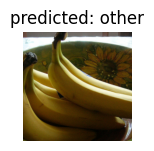

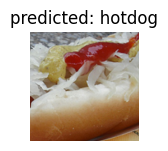

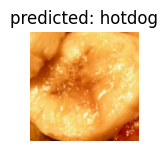

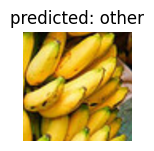

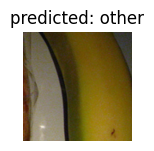

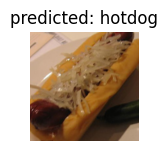

In [53]:
visualize_model(model_ft)

## Zadanie dodatkowe (3 punkty)

W zadaniach dotyczących klasyfikacji obrazu wykorzystywaliśmy prosty zbiór danych i sieć LeNet. Teraz zamień zbiór danych na bardziej skomplikowany, np. [ten](http://www.vision.caltech.edu/datasets/cub_200_2011/) lub [ten](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) (lub inny o podobnym poziomie trudności) i zamiast prostej sieci LeNet użyj bardziej złożonej, np. AlexNet, ResNet, MobileNetV2.


In [9]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
import torchvision.transforms as transforms

Moje rozwiązanie działa pod warunkiem że wywołamy wcześniej komórki z następującymi funkcjami:
* imshow(img, title=None)
* train_model(model, dataloaders, criterion, optimizer, num_epochs=25)

In [55]:
!pip install kaggle

  Using cached kaggle-1.6.17-py3-none-any.whl
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


In [1]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
... resuming from 1084227584 bytes (1379137851 bytes left) ...
100%|█████████████████████████████████████▉| 2.29G/2.29G [00:37<00:00, 35.5MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [00:37<00:00, 36.9MB/s]


In [3]:
!unzip -n chest-xray-pneumonia.zip

Archive:  chest-xray-pneumonia.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0010-0001.jpeg  
  inflating: chest_x

In [14]:
model_net =torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)
model_net.fc = nn.Linear(in_features=model_net.fc.in_features, out_features=2)

In [15]:
torch.manual_seed(17)

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

train_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

test_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

In [21]:
import os
data_dir = "chest_xray"
batch_size = 32

model_ft = model_net.to(device)
train_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "train"), transform=train_augs
    ),
    batch_size=batch_size,
    shuffle=True,
)
test_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "test"), transform=test_augs
    ),
    shuffle=True,
    batch_size=batch_size,
)
val_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "val"), transform=test_augs
    ),
    shuffle=True,
    batch_size=batch_size,
)
loss = nn.CrossEntropyLoss(reduction="none")

In [22]:
def train_fine_tuning_2(net, learning_rate, num_epochs=15):
    params=[
    {"params": [param for name, param in net.named_parameters() if "fc" not in name],"lr":learning_rate},
    {"params": [param for name, param in net.named_parameters() if "fc" in name],"lr":learning_rate*10}
    ]
    trainer = torch.optim.SGD(params=params) # your code here
    
    dataloaders_dict = {"train": train_iter, "val": val_iter}
    criterion = nn.CrossEntropyLoss()
    model_ft, hist = train_model(
        net, dataloaders_dict, criterion, trainer, num_epochs=num_epochs
    )
    return model_ft, hist

In [23]:
model_ft, hist = train_fine_tuning_2(model_ft, learning_rate=5e-5)

Epoch 1/15
----------
train Loss: 0.4119 Acc: 0.8127
val Loss: 0.7263 Acc: 0.5625

Epoch 2/15
----------
train Loss: 0.3692 Acc: 0.8386
val Loss: 0.6862 Acc: 0.5625

Epoch 3/15
----------
train Loss: 0.3485 Acc: 0.8489
val Loss: 0.6949 Acc: 0.5625

Epoch 4/15
----------
train Loss: 0.3346 Acc: 0.8581
val Loss: 0.6978 Acc: 0.5625

Epoch 5/15
----------
train Loss: 0.3157 Acc: 0.8620
val Loss: 0.7306 Acc: 0.6250

Epoch 6/15
----------
train Loss: 0.3111 Acc: 0.8645
val Loss: 0.7072 Acc: 0.6250

Epoch 7/15
----------
train Loss: 0.3053 Acc: 0.8648
val Loss: 0.7045 Acc: 0.6250

Epoch 8/15
----------
train Loss: 0.2885 Acc: 0.8762
val Loss: 0.7506 Acc: 0.6250

Epoch 9/15
----------
train Loss: 0.2795 Acc: 0.8815
val Loss: 0.6780 Acc: 0.6250

Epoch 10/15
----------
train Loss: 0.2742 Acc: 0.8852
val Loss: 0.7664 Acc: 0.6875

Epoch 11/15
----------
train Loss: 0.2658 Acc: 0.8880
val Loss: 0.8650 Acc: 0.6250

Epoch 12/15
----------
train Loss: 0.2686 Acc: 0.8890
val Loss: 0.8382 Acc: 0.6250

E

In [25]:
import matplotlib.pyplot as plt
plt.ion()  


def visualize_model_2(model,class_names=["hotdog", "other"], num_images=6):
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_iter):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'True: {class_names[labels[j]]}\nPredicted: {class_names[preds[j]]}')

                imshow(inputs.data[j].cpu())

                if images_so_far == num_images:
                    return



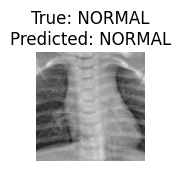

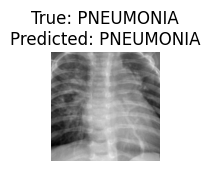

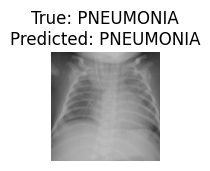

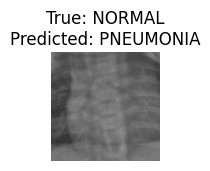

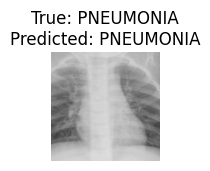

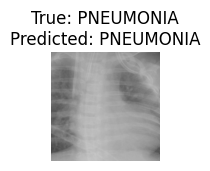

In [36]:
visualize_model_2(model_ft,class_names=["NORMAL", "PNEUMONIA"])

In [43]:
def messure_model(model):
    correct = 0
    total = 0
    correct_normal = 0
    wrong_normal = 0
    total_normal = 0
    correct_pneumonia = 0
    total_pneumonia = 0
    wrong_pneumonia = 0

    model.eval()  # Ustawienie modelu w tryb ewaluacji
    with torch.no_grad():
        for inputs, labels in test_iter:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            correct += torch.sum(preds == labels).item()
            total += labels.size(0)
            
            correct_normal += torch.sum((preds == labels) & (labels == 0)).item()
            wrong_normal += torch.sum((preds == labels) & (labels != 0)).item()
            total_normal += torch.sum((labels == 0)).item()
            correct_pneumonia += torch.sum((preds == labels) & (labels == 1)).item()
            total_pneumonia += torch.sum((labels == 1)).item()
            wrong_pneumonia += torch.sum((preds == labels) & (labels != 1)).item()

    accuracy = correct / total * 100
    precision = total_pneumonia/(total_pneumonia+wrong_pneumonia)
    recall = total_pneumonia/(total_pneumonia+wrong_normal)
    f1_score = 2*precision*recall/(precision+recall)*100
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"F1-Score: {f1_score:.2f}%")
    print(f"Poprawnie sklasyfikowane NORMAL: {correct_normal/total_normal*100:.2f}%")
    print(f"Poprawnie sklasyfikowane PNEUMONIA: {correct_pneumonia/total_pneumonia*100:.2f}%")



In [44]:
messure_model(model_ft)

Accuracy: 84.32%
Precision: 70.27%
Recall: 51.86%
F1-Score: 59.68%
Poprawnie sklasyfikowane NORMAL: 70.21%
Poprawnie sklasyfikowane PNEUMONIA: 92.82%


Jak widać rozwiązanie daje całkiem dobre wyniki. Wydaje mi sie to że w takim modelu ważniejsze by było wykrywanie zapalenia płuc.